In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import glob, os
import numpy as np
import cv2
from matplotlib import animation
import math
from skimage.measure import EllipseModel, ransac
from matplotlib.patches import Ellipse

In [2]:
cutoff_p = 0.9
project_name = r'\pupil-Hao Shen-2022-09-15'
vid = 'pupil_032722.avi'

In [3]:
csv_path = r"C:\Users\haosh\Documents\Lab\Behavior\DeepLabCut" +  project_name + r"\videos"
os.chdir(csv_path)
print('The list of csv(s) for the selected movie:')
l = glob.glob(f"{vid[:-4]}*filtered.csv")
print(l)


The list of csv(s) for the selected movie:
['pupil_032722DLC_resnet101_pupilSep15shuffle1_250000_filtered.csv']


In [4]:
df = pd.read_csv(l[0], header=None)
df

C:\Users\haosh\AppData\Local\Temp\ipykernel_6680\3509364252.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(l[0], header=None)


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,scorer,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,...,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000,DLC_resnet101_pupilSep15shuffle1_250000
1,bodyparts,left,left,left,right,right,right,top,top,top,...,lefttop_pupil,righttop_pupil,righttop_pupil,righttop_pupil,leftbottom_pupil,leftbottom_pupil,leftbottom_pupil,rightbottom_pupil,rightbottom_pupil,rightbottom_pupil
2,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
3,0,814.751708984375,564.3803100585938,0.9988901019096375,891.1162719726562,545.1410522460938,0.9969930648803711,846.877685546875,524.2603759765625,0.9933131337165833,...,0.9988491535186768,856.9002075195312,539.48681640625,0.9996063113212585,846.2398681640625,552.519287109375,0.9988424181938171,858.6968383789062,551.9401245117188,0.9990401864051819
4,1,814.751708984375,564.3803100585938,0.9987607002258301,891.1162719726562,545.1410522460938,0.997437596321106,846.877685546875,524.2603759765625,0.9943187832832336,...,0.9988628625869751,856.9002075195312,539.48681640625,0.9996218681335449,846.2398681640625,552.519287109375,0.9989355206489563,858.6968383789062,551.9401245117188,0.999078631401062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19807,19804,781.891724,574.425964,0.995962,856.273132,551.025269,0.998052,811.142761,535.94104,0.994572,...,0.999585,820.594666,551.636902,0.999894,813.093994,561.766418,0.999718,822.16687,560.847656,0.999772
19808,19805,781.891724,574.425964,0.996037,856.273132,551.025269,0.998156,811.142761,535.94104,0.994758,...,0.999592,820.594666,551.636902,0.999898,813.093994,561.766418,0.999711,822.16687,560.847656,0.999758
19809,19806,781.825073,574.372009,0.995329,856.273132,550.636963,0.998259,811.142761,535.93927,0.995367,...,0.999579,820.855652,551.584229,0.999907,813.242676,561.760864,0.999727,822.147705,560.781494,0.999771
19810,19807,781.377991,574.181702,0.995421,855.703125,550.606689,0.997799,810.671814,535.212463,0.994769,...,0.999651,820.594666,550.925964,0.999921,813.093994,561.164307,0.999706,822.044434,560.049805,0.99973


In [5]:
body_parts = df.iloc[1].unique()[1:]

length = df.shape[0] - 3
body_part_arr = np.empty((length, 1))


for body_part in body_parts:
    body_part_df = df[df.columns[df.iloc[1] == body_part]]
    body_part_temp = body_part_df.iloc[3:, 0:3]
    body_part_temp_x = np.array(body_part_temp.apply(lambda x:np.nan if float(x.values[2]) < cutoff_p \
                                                     else float(x.values[0]), axis=1)).reshape(-1,1)

    body_part_temp_y = np.array(body_part_temp.apply(lambda x:np.nan if float(x.values[2]) < cutoff_p \
                                                     else float(x.values[1]), axis=1)).reshape(-1,1)
    body_part_arr = np.hstack((body_part_arr, body_part_temp_x, body_part_temp_y))

body_part_arr = body_part_arr[:, 1:]
pd.DataFrame(body_part_arr)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,814.751709,564.380310,891.116272,545.141052,846.877686,524.260376,860.941589,570.706726,824.603149,541.666199,...,851.600342,555.436829,843.488647,541.079651,856.900208,539.486816,846.239868,552.519287,858.696838,551.940125
1,814.751709,564.380310,891.116272,545.141052,846.877686,524.260376,860.941589,570.706726,824.603149,541.666199,...,851.600342,555.436829,843.488647,541.079651,856.900208,539.486816,846.239868,552.519287,858.696838,551.940125
2,814.751709,564.380310,891.116272,545.141052,846.877686,524.260376,860.941589,570.706726,824.603149,541.666199,...,851.600342,555.436829,843.488647,541.079651,856.900208,539.486816,846.239868,552.519287,858.696838,551.940125
3,814.576050,564.198303,891.079773,545.097168,846.798645,524.158142,860.661499,570.532471,824.393555,541.361328,...,851.410339,555.061584,843.389526,540.866638,856.659241,539.369812,846.146545,552.169556,858.465149,551.646057
4,814.532776,564.198303,890.989197,545.069092,846.786987,524.158142,860.648438,570.510010,824.171448,541.361328,...,851.315857,554.876404,843.289062,540.862915,856.440247,539.328918,846.064575,552.074219,858.318665,551.057129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19804,781.891724,574.425964,856.273132,551.025269,811.142761,535.941040,826.066956,582.961670,792.944824,552.821045,...,816.505127,563.630554,811.482056,552.372925,820.594666,551.636902,813.093994,561.766418,822.166870,560.847656
19805,781.891724,574.425964,856.273132,551.025269,811.142761,535.941040,826.066956,582.961670,792.944824,552.821045,...,816.533997,563.630554,811.482056,552.372925,820.594666,551.636902,813.093994,561.766418,822.166870,560.847656
19806,781.825073,574.372009,856.273132,550.636963,811.142761,535.939270,825.970154,582.961670,792.944824,552.760803,...,816.730103,563.584290,811.681763,552.309326,820.855652,551.584229,813.242676,561.760864,822.147705,560.781494
19807,781.377991,574.181702,855.703125,550.606689,810.671814,535.212463,825.970154,582.700134,792.420410,552.359802,...,816.533997,563.053833,811.470886,551.854309,820.594666,550.925964,813.093994,561.164307,822.044434,560.049805


In [6]:
print(f'Counts of np.nan is {np.sum(np.isnan(body_part_arr))}')

Counts of np.nan is 26


In [7]:
# for c in range(body_part_arr.shape[1]):
#     flag = False
#     for r in range(body_part_arr.shape[0]):
#         if not flag:
#             if np.isnan(body_part_arr[r][c]):
#                 continue
#             else:
#                 flag = True
#         else:
#             if np.isnan(body_part_arr[r][c]):
#                 body_part_arr[r][c] = body_part_arr[r-1][c]
#             else:
#                 continue
            

In [8]:
for c in range(body_part_arr.shape[1]):
    # Fill in nan in the front
    if np.isnan(body_part_arr[0, c]):
        for r in range(1, body_part_arr.shape[0]):
            if np.isnan(body_part_arr[r, c]):
                continue
            else:
                body_part_arr[:r, c] = body_part_arr[r, c]
                break
    
    # Fill in nan at the back
    if np.isnan(body_part_arr[-1, c]):
        for r in range(body_part_arr.shape[0]-2, -1, -1):
            if np.isnan(body_part_arr[r, c]):
                continue
            else:
                body_part_arr[r+1:, c] = body_part_arr[r, c]
                break
    
    # Fill in nan in the center
    null_bool = np.isnan(body_part_arr[:, c]) * 1
    indicater_vec = null_bool[:-1] - null_bool[1:]
    neg_idx_start = []
    pos_idx_stop = []
    for i in range(len(indicater_vec)):
        if indicater_vec[i] == -1:
            neg_idx_start.append(i + 1)
        elif indicater_vec[i] == 1:
            pos_idx_stop.append(i + 1)
            
    assert(len(neg_idx_start) == len(pos_idx_stop))
    for i in range(len(neg_idx_start)):
        assert(neg_idx_start[i] < pos_idx_stop[i])
        start_val = body_part_arr[neg_idx_start[i] - 1, c]
        end_val = body_part_arr[pos_idx_stop[i], c]
        part = (end_val - start_val) / (pos_idx_stop[i] - neg_idx_start[i] + 1)
        idx = neg_idx_start[i]
        while idx < pos_idx_stop[i]:
            body_part_arr[idx, c] = start_val + part
            start_val += part
            idx += 1
            
body_part_arr

array([[814.75170898, 564.38031006, 891.11627197, ..., 552.51928711,
        858.69683838, 551.94012451],
       [814.75170898, 564.38031006, 891.11627197, ..., 552.51928711,
        858.69683838, 551.94012451],
       [814.75170898, 564.38031006, 891.11627197, ..., 552.51928711,
        858.69683838, 551.94012451],
       ...,
       [781.82507324, 574.37200928, 856.27313232, ..., 561.76086426,
        822.14770508, 560.78149414],
       [781.37799072, 574.18170166, 855.703125  , ..., 561.16430664,
        822.04443359, 560.04980469],
       [781.34643555, 574.02502441, 855.42297363, ..., 560.99066162,
        821.97119141, 560.04437256]])

In [9]:
# dist_arr = np.empty((body_part_arr.shape[0],))
# deviate_arr = np.empty((body_part_arr.shape[0],))
# # a_eye_list = []

# for time in range(body_part_arr.shape[0]):
#     eye_points = body_part_arr[time, :16].reshape((-1,2))
#     ell = EllipseModel()
#     result = ell.estimate(eye_points)
#     if result == False:
#         ransac_model, inliers = ransac(eye_points, EllipseModel, 7, 10, max_trials=50)
#         xc_eye, yc_eye, a_eye, b_eye, theta_eye = ransac_model.params
#     else:
#         xc_eye, yc_eye, a_eye, b_eye, theta_eye = ell.params
#     # a_eye_list.append(a_eye)

#     pupil_points = body_part_arr[time, 16:].reshape((-1,2))
#     ell = EllipseModel()
#     result = ell.estimate(pupil_points)
#     if result == False:
#         ransac_model, inliers = ransac(pupil_points, EllipseModel, 7, 10, max_trials=50)
#         xc_pupil, yc_pupil, a_pupil, b_pupil, theta_pupil = ransac_model.params
#     else:
#         xc_pupil, yc_pupil, a_pupil, b_pupil, theta_pupil = ell.params
    
#     dist_arr[time] = math.sqrt((xc_eye-xc_pupil)**2 + (yc_eye-yc_pupil)**2)
#     if dist_arr[time] > np.max([a_pupil, b_pupil]):
#         deviate_arr[time] = True
#     else:
#         deviate_arr[time] = False

# eye_length_pixel = np.mean(a_eye_list)
# eye_length_pixel
# thre_pupil_motion_pixel = 2.26 / 3 * eye_length_pixel
# thre_pupil_motion_pixel

In [ ]:
dist_arr = np.empty((body_part_arr.shape[0],))
deviate_arr = np.empty((body_part_arr.shape[0],))
a_eye_list = []
xc_eye_list = []
yc_eye_list = []
xc_pupil_list = []
yc_pupil_list = []

for time in range(body_part_arr.shape[0]):
    eye_points = body_part_arr[time, :16].reshape((-1,2))
    ell = EllipseModel()
    result = ell.estimate(eye_points)
    if result == False:
        ransac_model, inliers = ransac(eye_points, EllipseModel, 7, 10, max_trials=50)
        xc_eye, yc_eye, a_eye, b_eye, theta_eye = ransac_model.params
    else:
        xc_eye, yc_eye, a_eye, b_eye, theta_eye = ell.params
    a_eye_list.append(a_eye)
    # xc_eye_list.append(xc_eye)
    # yc_eye_list.append(yc_eye)
    
    pupil_points = body_part_arr[time, 16:].reshape((-1,2))
    ell = EllipseModel()
    result = ell.estimate(pupil_points)
    if result == False:
        ransac_model, inliers = ransac(pupil_points, EllipseModel, 7, 10, max_trials=50)
        xc_pupil, yc_pupil, a_pupil, b_pupil, theta_pupil = ransac_model.params
    else:
        xc_pupil, yc_pupil, a_pupil, b_pupil, theta_pupil = ell.params
    xc_pupil_list.append(xc_pupil)
    yc_pupil_list.append(yc_pupil)
    
eye_length_pixel = np.mean(a_eye_list)
thre_pupil_motion_pixel = 2.26 / 3 * eye_length_pixel
# xc_eye_mean = np.mean(xc_eye_list)
# yc_eye_mean = np.mean(yc_eye_list)
# print(f'Threshold pupil motion pixel: {thre_pupil_motion_pixel}')
# print(f'Mean eye center x: {xc_eye_mean}')
# print(f'Mean eye center y: {yc_eye_mean}')
xc_pupil_mean = np.mean(xc_pupil_list)
yc_pupil_mean = np.mean(yc_pupil_list)
print(f'Threshold pupil motion pixel: {thre_pupil_motion_pixel}')
print(f'Mean pupil center x: {xc_pupil_mean}')
print(f'Mean pupil center y: {yc_pupil_mean}')

for time in range(body_part_arr.shape[0]):
    pupil_points = body_part_arr[time, 16:].reshape((-1,2))
    ell = EllipseModel()
    result = ell.estimate(pupil_points)
    if result == False:
        ransac_model, inliers = ransac(pupil_points, EllipseModel, 7, 10, max_trials=50)
        xc_pupil, yc_pupil, a_pupil, b_pupil, theta_pupil = ransac_model.params
    else:
        xc_pupil, yc_pupil, a_pupil, b_pupil, theta_pupil = ell.params

    dist_arr[time] = math.sqrt((xc_pupil_mean-xc_pupil)**2 + (yc_pupil_mean-yc_pupil)**2)
    
    if dist_arr[time] > np.max([a_pupil, b_pupil]):
        deviate_arr[time] = True
    else:
        deviate_arr[time] = False



Threshold pupil motion pixel: 17.828551540187515
Mean pupil center x: 820.1685904708554
Mean pupil center y: 558.7470322631484


In [11]:
# if glob.glob("*.mp4")[0] == 'tracker.mp4':
#     vid = glob.glob("*.mp4")[1]
# else:
#     vid = glob.glob("*.mp4")[0]
vid = glob.glob(f"{vid[:-4]}*.mp4")[0]

cap = cv2.VideoCapture(vid)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_times = np.arange(len(dist_arr)) * 1 / fps
# ephy_trigger = np.load(r"C:\Users\haosh\Desktop\trigger_info.npy")
frame_times

array([0.00000000e+00, 2.88001843e-02, 5.76003686e-02, ...,
       5.70416451e+02, 5.70445251e+02, 5.70474051e+02])

In [12]:
sampling_frequency = 10000
movie_trigger_info = ephy_trigger[:int(frame_times[-1] * sampling_frequency)]

# # image
# repeats = Movie_StmulationIndices.shape[0]
# NumMovies = Movie_StmulationIndices.shape[1]
trigger_val = 2500
trigger_up_indices = np.flatnonzero((movie_trigger_info[:-1] < trigger_val) & (movie_trigger_info[1:] > trigger_val))+1
trigger_up_time = trigger_up_indices / sampling_frequency
trigger_up_time
# interval_indices = trigger_up_indices[:-1][(((trigger_up_indices[1:] - trigger_up_indices[:-1])>280000)*1 + 
#                                          ((trigger_up_indices[1:] - trigger_up_indices[:-1])<310000)*1)>1][:-1] # Indices of start of intervals
# random_event_indices = np.concatenate((interval_indices, np.array([trigger_up_indices[-3]]))).reshape((repeats, NumMovies))

# event_indices = np.zeros((repeats, NumMovies, 2))
# for rep in np.arange(repeats):
#     event_indices[rep,Movie_StmulationIndices[rep,:]-1,0] = random_event_indices[rep,:] - 2*sampling_frequency
#     event_indices[rep,Movie_StmulationIndices[rep,:]-1,1] = random_event_indices[rep,:] + 32*sampling_frequency # what is 0.5 and 1.5 here?

NameError: name 'ephy_trigger' is not defined

In [ ]:
%matplotlib inline
mean = np.mean(dist_arr)
std = np.std(dist_arr)*3
plt.figure(figsize=(30,5))
plt.plot(np.arange(dist_arr.shape[0])/fps, dist_arr)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Deviation (pixel)', fontsize=20)
plt.title('Deviation of pupil as a function of time', fontsize=30, pad=10)
plt.axhline(thre_pupil_motion_pixel, c='r')
# plt.plot([0, dist_arr.shape[0]-1], [mean, mean])
# plt.plot([0, dist_arr.shape[0]-1], [mean-std, mean-std])
# plt.plot([0, dist_arr.shape[0]-1], [mean+std, mean+std])

# for i,dist in enumerate(dist_arr):
#     if deviate_arr[i] == True:
#         plt.scatter([i], [dist], color = 'r', s=1)

trigger_index = 0
while trigger_index < len(trigger_up_time):
    flag = 'green'
    if trigger_index % 2 == 1:
        trigger_index += 1
        continue
    start = trigger_up_time[trigger_index]
    try:
        end = trigger_up_time[trigger_index + 1]
    except IndexError:
        break
    cond = dist_arr[((np.arange(dist_arr.shape[0])/fps > start) * 1 + (np.arange(dist_arr.shape[0])/fps < end) * 1) == 2] > thre_pupil_motion_pixel
    if np.sum(cond * 1) > 0:
        flag = 'red'
            
    plt.axvspan(start, end, alpha=0.25, color=flag)
    trigger_index += 1

# Plotting Ellipse

In [12]:
if not os.path.isdir('frames'):
    os.mkdir('frames')
    i=0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        cv2.imwrite('frames/' + str(i) + '.jpg', frame)
        i += 1

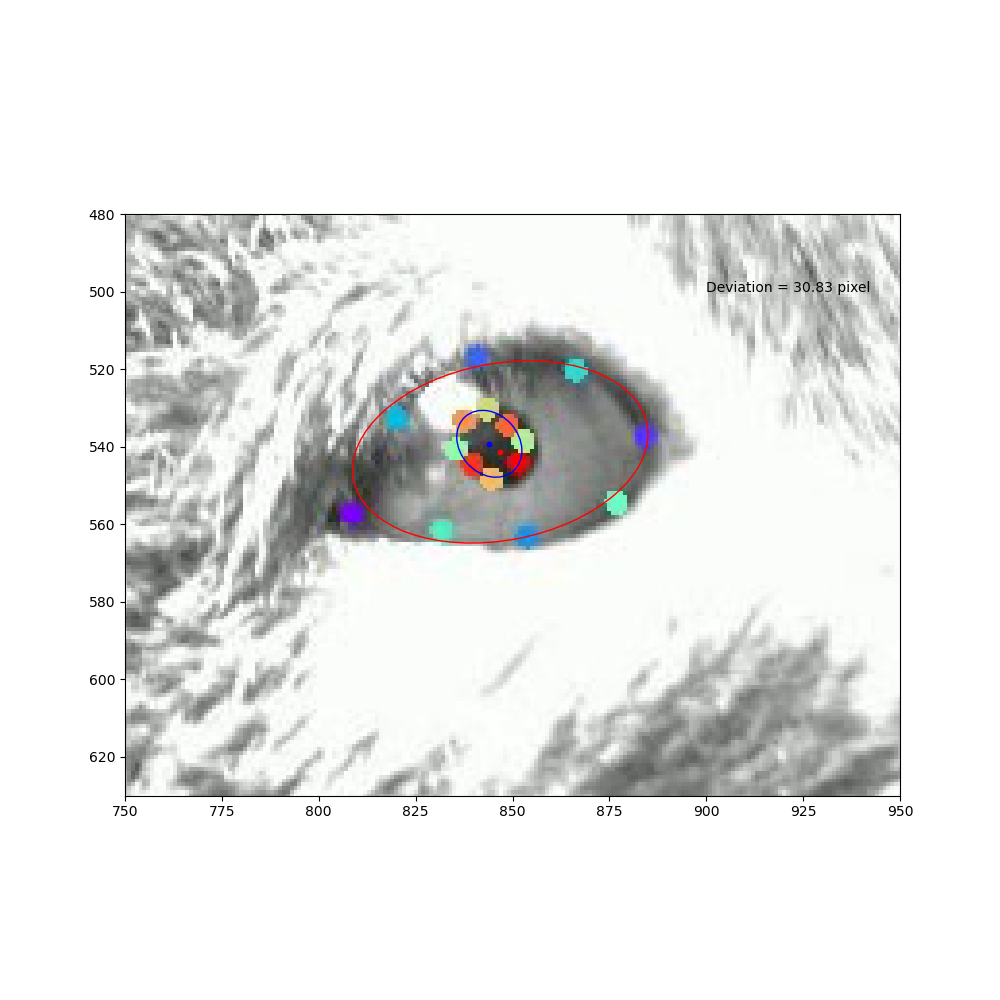

In [13]:

# time = 10743
# time = 18602 # Max
time = 88 # Min
eye_points = body_part_arr[time, :16].reshape((-1,2))
ell = EllipseModel()
result = ell.estimate(eye_points)
if result == False:
    ransac_model, inliers = ransac(eye_points, EllipseModel, 7, 10, max_trials=50)
    xc_eye, yc_eye, a_eye, b_eye, theta_eye = ransac_model.params
else:
    xc_eye, yc_eye, a_eye, b_eye, theta_eye = ell.params

pupil_points = body_part_arr[time, 16:].reshape((-1,2))
ell = EllipseModel()
result = ell.estimate(pupil_points)
if result == False:
    ransac_model, inliers = ransac(pupil_points, EllipseModel, 7, 10, max_trials=50)
    xc_pupil, yc_pupil, a_pupil, b_pupil, theta_pupil = ransac_model.params
else:
    xc_pupil, yc_pupil, a_pupil, b_pupil, theta_pupil = ell.params

fig, axs = plt.subplots(sharex=True, sharey=True, figsize=(10,10))
im = plt.imread('frames/' + str(time)+'.jpg')
axs.imshow(im)

x_eye = eye_points[:,0]
y_eye = eye_points[:,1]
# axs.scatter(x_eye, y_eye, color='red', alpha=0.2)
axs.scatter(xc_eye, yc_eye, color='red', s=10)
ell_patch = Ellipse((xc_eye, yc_eye), 2*a_eye, 2*b_eye, theta_eye*180/np.pi, edgecolor='red', facecolor='none')
axs.add_patch(ell_patch)

x_pupil = pupil_points[:,0]
y_pupil = pupil_points[:,1]
# axs.scatter(x_pupil, y_pupil, color='blue', alpha=0.2)
axs.scatter(xc_pupil, yc_pupil, color='blue', s=10)
ell_patch = Ellipse((xc_pupil, yc_pupil), 2*a_pupil, 2*b_pupil, theta_pupil*180/np.pi, edgecolor='blue', facecolor='none')
axs.add_patch(ell_patch)
axs.set_xlim([750, 950])
axs.set_ylim([480, 630])
axs.invert_yaxis()
axs.annotate(f'Deviation = {round(dist_arr[time],2)} pixel', (900,500))
plt.show()

In [16]:
body_part_arr

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,top_bottom,left_right,r_estimate,A_estimate
0,814.751709,564.380310,891.116272,545.141052,846.877686,524.260376,860.941589,570.706726,824.603149,541.666199,...,856.900208,539.486816,846.239868,552.519287,858.696838,551.940125,46.621117,48.918863,23.310559,1707.085361
1,814.751709,564.380310,891.116272,545.141052,846.877686,524.260376,860.941589,570.706726,824.603149,541.666199,...,856.900208,539.486816,846.239868,552.519287,858.696838,551.940125,46.621117,48.918863,23.310559,1707.085361
2,814.751709,564.380310,891.116272,545.141052,846.877686,524.260376,860.941589,570.706726,824.603149,541.666199,...,856.900208,539.486816,846.239868,552.519287,858.696838,551.940125,46.621117,48.918863,23.310559,1707.085361
3,814.576050,564.198303,891.079773,545.097168,846.798645,524.158142,860.661499,570.532471,824.393555,541.361328,...,856.659241,539.369812,846.146545,552.169556,858.465149,551.646057,46.518709,48.982253,23.259355,1699.594013
4,814.532776,564.198303,890.989197,545.069092,846.786987,524.158142,860.648438,570.510010,824.171448,541.361328,...,856.440247,539.328918,846.064575,552.074219,858.318665,551.057129,46.545589,48.898907,23.272795,1701.558748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19804,781.891724,574.425964,856.273132,551.025269,811.142761,535.941040,826.066956,582.961670,792.944824,552.821045,...,820.594666,551.636902,813.093994,561.766418,822.166870,560.847656,44.992326,47.584497,22.496163,1589.888874
19805,781.891724,574.425964,856.273132,551.025269,811.142761,535.941040,826.066956,582.961670,792.944824,552.821045,...,820.594666,551.636902,813.093994,561.766418,822.166870,560.847656,44.992326,47.584497,22.496163,1589.888874
19806,781.825073,574.372009,856.273132,550.636963,811.142761,535.939270,825.970154,582.961670,792.944824,552.760803,...,820.855652,551.584229,813.242676,561.760864,822.147705,560.781494,44.972996,47.463381,22.486498,1588.523084
19807,781.377991,574.181702,855.703125,550.606689,810.671814,535.212463,825.970154,582.700134,792.420410,552.359802,...,820.594666,550.925964,813.093994,561.164307,822.044434,560.049805,45.398510,47.589927,22.699255,1618.725016


In [17]:
body_part_arr = pd.DataFrame(body_part_arr)
body_part_arr['top_bottom'] = body_part_arr.apply(lambda x: math.sqrt((x[0] - x[6])**2+(x[1] - x[7])**2), axis=1)
body_part_arr['left_right'] = body_part_arr.apply(lambda x: math.sqrt((x[2] - x[4])**2+(x[3] - x[5])**2), axis=1)
body_part_arr['r_estimate'] = body_part_arr.apply(lambda x: (x['top_bottom'] + x['left_right']) / 4, axis=1)
body_part_arr['A_estimate'] = body_part_arr.apply(lambda x: x['r_estimate']**2 * math.pi, axis=1)
body_part_arr

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,top_bottom,left_right,r_estimate,A_estimate
0,814.751709,564.380310,891.116272,545.141052,846.877686,524.260376,860.941589,570.706726,824.603149,541.666199,...,856.900208,539.486816,846.239868,552.519287,858.696838,551.940125,46.621117,48.918863,23.884995,1792.256595
1,814.751709,564.380310,891.116272,545.141052,846.877686,524.260376,860.941589,570.706726,824.603149,541.666199,...,856.900208,539.486816,846.239868,552.519287,858.696838,551.940125,46.621117,48.918863,23.884995,1792.256595
2,814.751709,564.380310,891.116272,545.141052,846.877686,524.260376,860.941589,570.706726,824.603149,541.666199,...,856.900208,539.486816,846.239868,552.519287,858.696838,551.940125,46.621117,48.918863,23.884995,1792.256595
3,814.576050,564.198303,891.079773,545.097168,846.798645,524.158142,860.661499,570.532471,824.393555,541.361328,...,856.659241,539.369812,846.146545,552.169556,858.465149,551.646057,46.518709,48.982253,23.875241,1790.792981
4,814.532776,564.198303,890.989197,545.069092,846.786987,524.158142,860.648438,570.510010,824.171448,541.361328,...,856.440247,539.328918,846.064575,552.074219,858.318665,551.057129,46.545589,48.898907,23.861124,1788.675977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19804,781.891724,574.425964,856.273132,551.025269,811.142761,535.941040,826.066956,582.961670,792.944824,552.821045,...,820.594666,551.636902,813.093994,561.766418,822.166870,560.847656,44.992326,47.584497,23.144206,1682.807478
19805,781.891724,574.425964,856.273132,551.025269,811.142761,535.941040,826.066956,582.961670,792.944824,552.821045,...,820.594666,551.636902,813.093994,561.766418,822.166870,560.847656,44.992326,47.584497,23.144206,1682.807478
19806,781.825073,574.372009,856.273132,550.636963,811.142761,535.939270,825.970154,582.961670,792.944824,552.760803,...,820.855652,551.584229,813.242676,561.760864,822.147705,560.781494,44.972996,47.463381,23.109094,1677.705499
19807,781.377991,574.181702,855.703125,550.606689,810.671814,535.212463,825.970154,582.700134,792.420410,552.359802,...,820.594666,550.925964,813.093994,561.164307,822.044434,560.049805,45.398510,47.589927,23.247109,1697.804917


# Animation

In [7]:
if glob.glob("*.mp4")[0] == 'tracker.mp4':
    vid = glob.glob("*.mp4")[1]
else:
    vid = glob.glob("*.mp4")[0]

cap = cv2.VideoCapture(vid)
fps = cap.get(cv2.CAP_PROP_FPS)
if not os.path.isdir('frames'):
    os.mkdir('frames')
    i=0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        cv2.imwrite('frames/' + str(i) + '.jpg', frame)
        i += 1

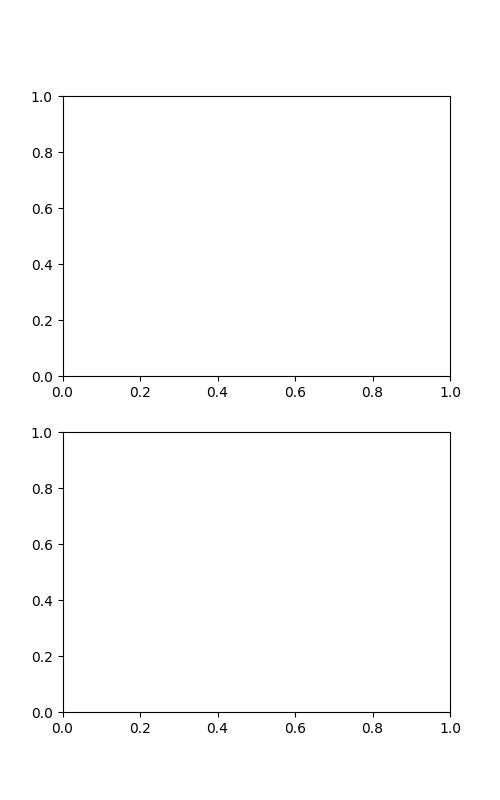

In [18]:
fig, ax = plt.subplots(2,1, figsize=(5,8))
# plt.title('Trajectory of Rat with Soft Implantation')
# plt.xticks(range(width), np.arange(width)/pixels_per_m*100)

def animate(i):
    ax[0].clear()
    ax[1].clear()
    im = plt.imread('frames/' + str(i)+'.jpg')
    ax[0].imshow(im)
    # for j, body_part in enumerate(body_parts):
    #     x_i = j*2
    #     y_i = x_i + 1
    ax[1].plot(range(i+1), body_part_arr.iloc[:i+1, 9], lw=2, label=body_part)
    ax[1].set_xlim([0, body_part_arr.shape[0]])
    ax[1].set_ylim([30, 65])
    # ax.legend(bbox_to_anchor=(1.4,1))
    # ax.set_title('Trajectory of Rat with Rigid Implantation')
    # plt.xticks(np.arange(0, width, 200), np.round(np.arange(0, width, 200)/pixels_per_m*100,1))
    # plt.yticks(np.arange(0, height, 200), np.round(np.arange(0, height, 200)/pixels_per_m*100,1))
    ax[1].set_xlabel('Frame')
    ax[1].set_ylabel('Area (Pixels)')
        
anim = animation.FuncAnimation(fig, animate, frames=body_part_arr.shape[0], interval=1000/fps, repeat=False)

In [19]:
f = 'tracker.mp4'
writevideo = animation.FFMpegWriter(fps=fps)
anim.save(f, writer=writevideo)